In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import pickle

In [3]:
with open("../Saved_Files/Train_Test_Data/X_train_fs", "br") as fh:
    X_train = pickle.load(fh)

with open("../Saved_Files/Train_Test_Data/y_train", "br") as fh:
    y_train = pickle.load(fh)

with open("../Saved_Files/Train_Test_Data/X_test_fs", "br") as fh:
    X_test = pickle.load(fh)

with open("../Saved_Files/Train_Test_Data/y_test", "br") as fh:
    y_test = pickle.load(fh)

In [4]:
#loading models
with open("../Saved_Files/Models/finalized_mlp.sav", "br") as fh:
    mlp = pickle.load(fh)

mlp

MLPClassifier(batch_size=32, hidden_layer_sizes=(32, 64, 32),
              learning_rate_init=0.01, max_iter=1000, random_state=0)

In [ ]:
print('start')
from sklearn.svm import SVC
param_grid = {'C': [1],  
              'gamma': [1], 
              'kernel': ['rbf'],
              'probability':[True],
              'random_state':[0]
           }

grid = GridSearchCV(SVC(), param_grid, verbose = 1, refit=True) 
grid.fit(X_train, y_train)


print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished



Training Accuracy: 
0.9894875164257556

Test Accuracy
0.8593272171253823

Precision, Recall, F1: 
(0.8679245283018868, 0.8466257668711656, 0.8571428571428571, None)


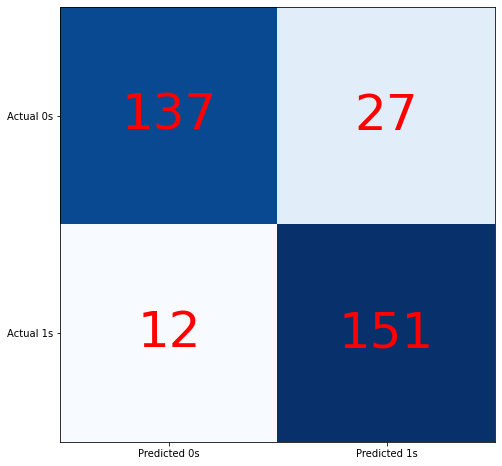

In [5]:
y_pred_lr = mlp.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()




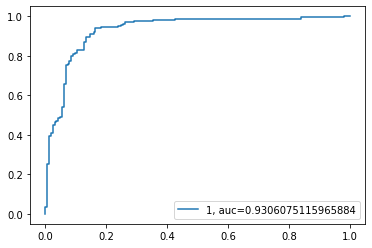

In [6]:
y_pred_proba = mlp.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()